In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os 
from glob import glob 

In [2]:
from notebook_utils import json_files_to_single_df, quality_vs_compression

In [3]:
%matplotlib inline 

# This notebook is for the analysis of results obtained from the compression of the 1200 Phi2D Phirth fields with method EZW to assess performance

In [4]:
files = glob("./files/Phi_2D_EZW_from_ruche/*.json") 

In [5]:
_data = json_files_to_single_df(files) 

In [6]:
_data.tail()


,image_name,compression_method,wavelet_used,compression_rate,metric_used,quality_value,compression_time,decompression_time
14395,Phi2D_d00387Phirth,ezw_25_passes,bior4.4,416.006335,PSNR,64.586692,8.213830,5.078929
14396,Phi2D_d00387Phirth,ezw_25_passes,bior4.4,416.006335,fourier_PSNR,140.035330,8.213830,5.078929
14397,Phi2D_d00387Phirth,ezw_30_passes,bior4.4,237.617098,L2_error,0.096943,8.974868,4.120381
14398,Phi2D_d00387Phirth,ezw_30_passes,bior4.4,237.617098,PSNR,71.334566,8.974868,4.120381
14399,Phi2D_d00387Phirth,ezw_30_passes,bior4.4,237.617098,fourier_PSNR,146.783204,8.974868,4.120381


In [7]:
_data = _data.sort_values(by=["image_name"], ignore_index=True)

In [8]:
_data.head() 

,image_name,compression_method,wavelet_used,compression_rate,metric_used,quality_value,compression_time,decompression_time
0,Phi2D_d00000Phirth,ezw_25_passes,bior4.4,300.650737,fourier_PSNR,110.509899,8.129287,4.996096
1,Phi2D_d00000Phirth,ezw_15_passes,bior4.4,1281.248780,fourier_PSNR,98.268828,6.584514,4.524918
2,Phi2D_d00000Phirth,ezw_20_passes,bior4.4,613.861525,L2_error,0.098471,7.838642,4.909733
3,Phi2D_d00000Phirth,ezw_20_passes,bior4.4,613.861525,PSNR,45.720462,7.838642,4.909733
4,Phi2D_d00000Phirth,ezw_20_passes,bior4.4,613.861525,fourier_PSNR,103.283244,7.838642,4.909733


## Here we distinguish between "linear" and "turbulent" phases as decided by eye

In [9]:
number_of_analysis_per_image = 12 
linear_data = _data[:number_of_analysis_per_image * 831] 
turbulent_data = _data[number_of_analysis_per_image * 831:]

In [10]:
linear_data.tail() 

,image_name,compression_method,wavelet_used,compression_rate,metric_used,quality_value,compression_time,decompression_time
9967,Phi2D_d00830Phirth,ezw_20_passes,bior4.4,688.482307,fourier_PSNR,131.115246,7.830589,4.950021
9968,Phi2D_d00830Phirth,ezw_20_passes,bior4.4,688.482307,L2_error,1.651280,7.830589,4.950021
9969,Phi2D_d00830Phirth,ezw_15_passes,bior4.4,1154.531868,fourier_PSNR,126.508108,6.599445,4.541873
9970,Phi2D_d00830Phirth,ezw_15_passes,bior4.4,1154.531868,L2_error,4.770178,6.599445,4.541873
9971,Phi2D_d00830Phirth,ezw_20_passes,bior4.4,688.482307,PSNR,56.387204,7.830589,4.950021


In [11]:
turbulent_data.tail() 

,image_name,compression_method,wavelet_used,compression_rate,metric_used,quality_value,compression_time,decompression_time
14395,Phi2D_d01199Phirth,ezw_30_passes,bior4.4,69.211067,PSNR,66.721164,9.347437,4.430983
14396,Phi2D_d01199Phirth,ezw_25_passes,bior4.4,145.475492,fourier_PSNR,134.011895,8.349157,5.101657
14397,Phi2D_d01199Phirth,ezw_30_passes,bior4.4,69.211067,fourier_PSNR,140.103580,9.347437,4.430983
14398,Phi2D_d01199Phirth,ezw_20_passes,bior4.4,395.566265,L2_error,2.490178,7.934199,4.995960
14399,Phi2D_d01199Phirth,ezw_25_passes,bior4.4,145.475492,PSNR,60.629480,8.349157,5.101657


In [12]:
linear_data = linear_data.sort_values(by=["compression_method"]) 
turbulent_data = turbulent_data.sort_values(by=["compression_method"])

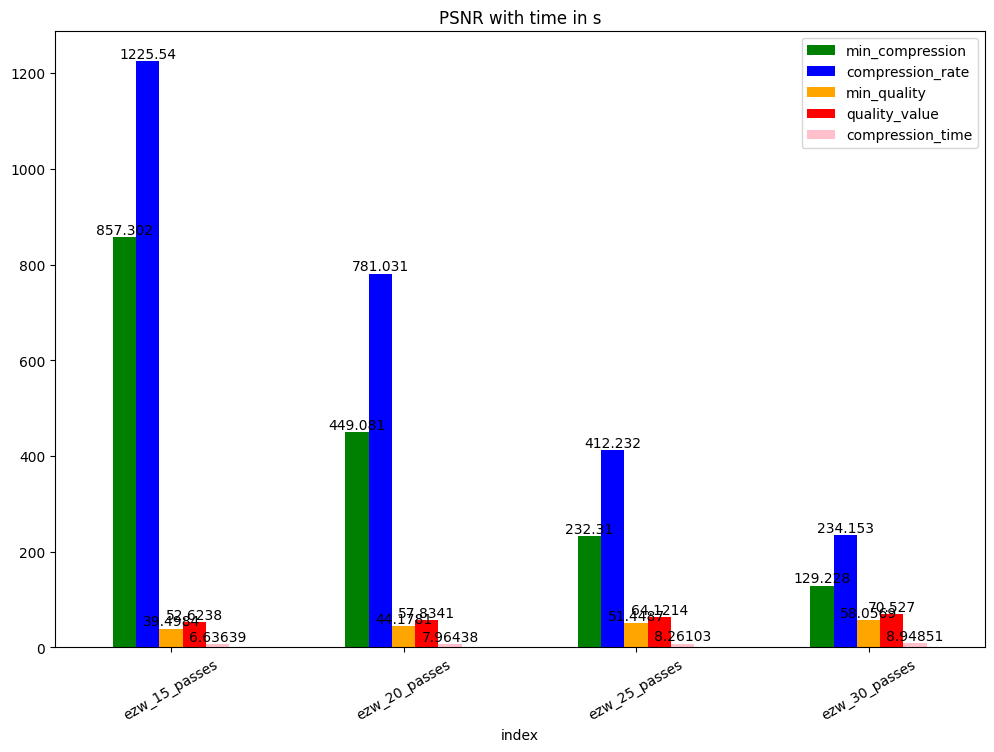

In [13]:
ax = quality_vs_compression(linear_data, "PSNR", time_scale="s")

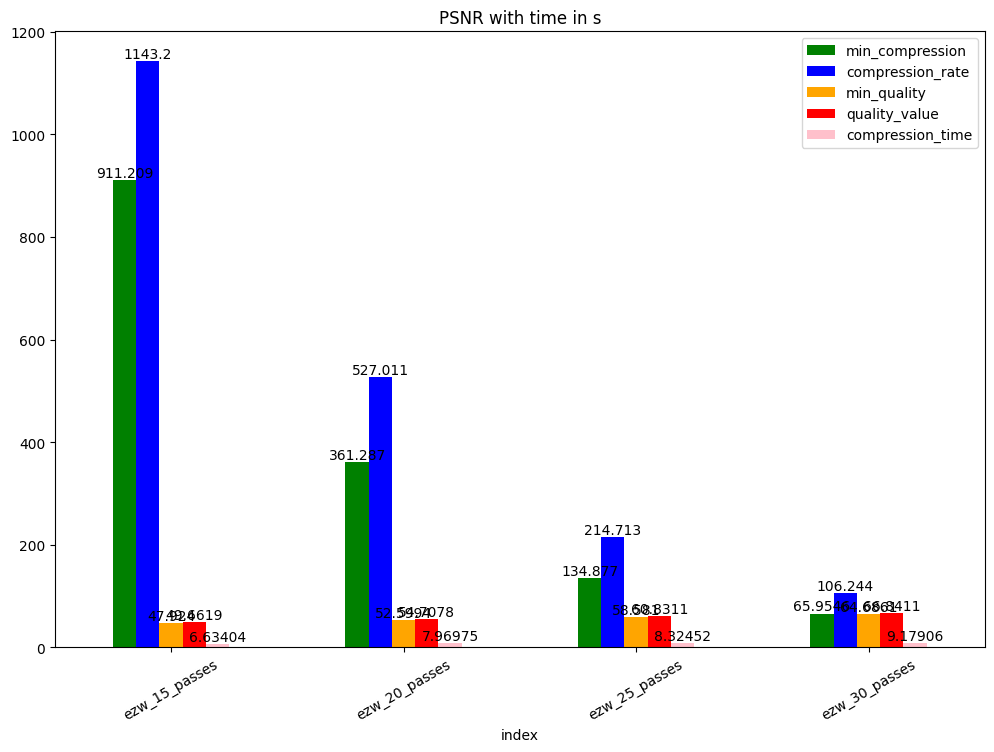

In [14]:
ax = quality_vs_compression(turbulent_data, "PSNR", time_scale="s")